In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C://Users//nikhi//OneDrive//Desktop//ecommerce_dashboard_exact_totals.csv")
df

,OrderID,Year,State,Category,ProductName,Brand,PaymentMethod,OrderStatus,Quantity,TotalAmount,Tax,ShippingCost
0,1,2024,IL,Electronics,Smartwatch,HomeEase,Amazon Pay,Delivered,-967,15849.46,10.58,109.48
1,2,2021,PA,Sports & Outdoors,LED Desk Lamp,HomeEase,Debit Card,Delivered,68,12841.07,9.33,124.50
2,3,2023,TX,Toys & Games,Gaming Mouse,BrightMax,UPI,Pending,60,15698.93,28.24,106.06
3,4,2023,TX,Home & Kitchen,LED Desk Lamp,ReadMore,Credit Card,Delivered,40,10553.35,29.47,140.99
4,5,2024,IN,Clothing,Water Bottle,Apex,UPI,Delivered,51,9288.80,28.98,193.86
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,2021,WA,Clothing,Mechanical Keyboard,ReadMore,Net Banking,Delivered,67,12248.24,26.79,175.96
5996,5997,2024,CO,Toys & Games,LED Desk Lamp,KiddoFun,Net Banking,Shipped,57,9259.56,28.04,99.38
5997,5998,2021,IN,Books,LED Desk Lamp,CoreTech,Credit Card,Delivered,44,21635.02,31.10,145.02
5998,5999,2021,CO,Toys & Games,Dress Shirt,KiddoFun,Net Banking,Delivered,39,18292.47,24.38,102.37


In [4]:

df.shape        # rows, columns


(6000, 12)

In [5]:
df.info()       # data types & null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        6000 non-null   int64  
 1   Year           6000 non-null   int64  
 2   State          6000 non-null   object 
 3   Category       6000 non-null   object 
 4   ProductName    6000 non-null   object 
 5   Brand          6000 non-null   object 
 6   PaymentMethod  6000 non-null   object 
 7   OrderStatus    6000 non-null   object 
 8   Quantity       6000 non-null   int64  
 9   TotalAmount    6000 non-null   float64
 10  Tax            6000 non-null   float64
 11  ShippingCost   6000 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 562.6+ KB


In [6]:
df.columns      # column names


Index(['OrderID', 'Year', 'State', 'Category', 'ProductName', 'Brand',
       'PaymentMethod', 'OrderStatus', 'Quantity', 'TotalAmount', 'Tax',
       'ShippingCost'],
      dtype='object')

In [7]:
df.describe()   # statistical summary (numerical columns)


,OrderID,Year,Quantity,TotalAmount,Tax,ShippingCost
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,2021.976833,50.000000,15305.000000,21.666667,140.223060
std,1732.195139,1.417850,17.518004,3784.841723,7.452146,34.699254
min,1.000000,2020.000000,-967.000000,8699.620000,8.620000,80.010000
25%,1500.750000,2021.000000,41.000000,12004.115000,15.277500,109.777500
50%,3000.500000,2022.000000,50.000000,15335.825000,21.740000,139.770000
75%,4500.250000,2023.000000,60.000000,18601.892500,28.082500,170.392500
max,6000.000000,2024.000000,70.000000,21746.740000,34.450000,199.970000


In [10]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

cat_cols


Index(['State', 'Category', 'ProductName', 'Brand', 'PaymentMethod',
       'OrderStatus'],
      dtype='object')

In [11]:
df[cat_cols[0]].value_counts()


State
IN    699
NC    694
OH    691
CO    679
IL    678
CA    650
WA    649
TX    645
PA    615
Name: count, dtype: int64

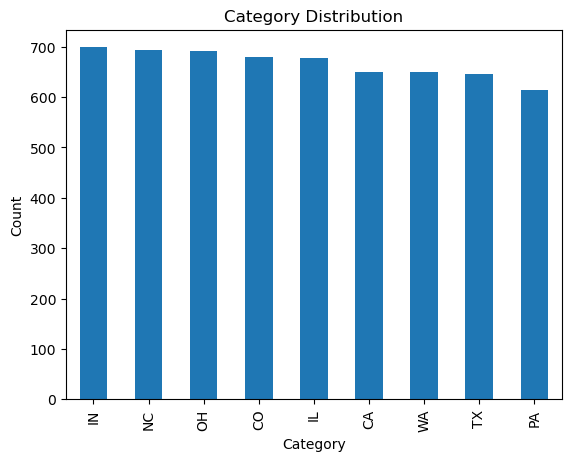

In [12]:
df[cat_cols[0]].value_counts().plot(kind='bar')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [14]:
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns
num_cols


Index(['OrderID', 'Year', 'Quantity', 'TotalAmount', 'Tax', 'ShippingCost'], dtype='object')

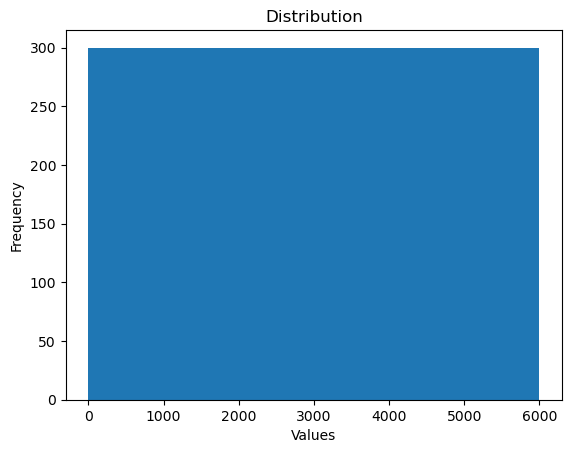

In [15]:
df[num_cols[0]].plot(kind='hist', bins=20)
plt.title("Distribution")
plt.xlabel("Values")
plt.show()


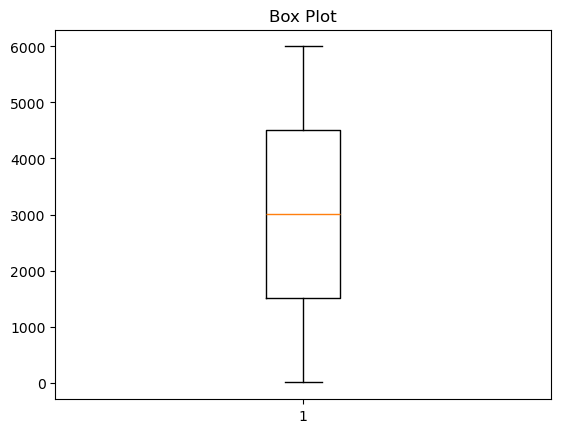

In [16]:
plt.boxplot(df[num_cols[0]])
plt.title("Box Plot")
plt.show()


In [17]:
corr = df[num_cols].corr()
corr


,OrderID,Year,Quantity,TotalAmount,Tax,ShippingCost
OrderID,1.000000,0.010965,0.003356,-0.010041,-0.002258,-0.016661
Year,0.010965,1.000000,-0.010241,-0.017914,0.010808,0.002844
Quantity,0.003356,-0.010241,1.000000,0.005611,0.028971,-0.003690
TotalAmount,-0.010041,-0.017914,0.005611,1.000000,0.008006,-0.006164
Tax,-0.002258,0.010808,0.028971,0.008006,1.000000,-0.020405
ShippingCost,-0.016661,0.002844,-0.003690,-0.006164,-0.020405,1.000000


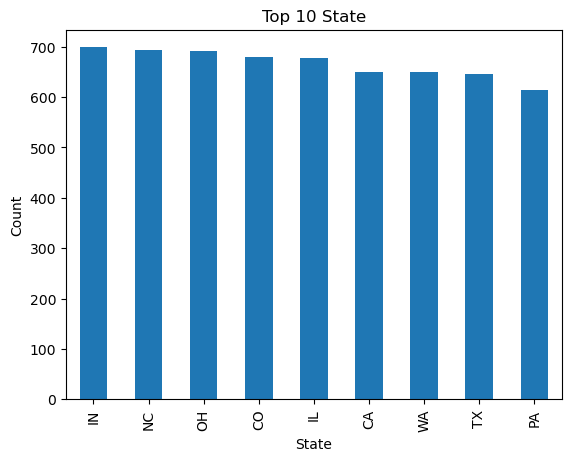

In [18]:
df[cat_cols[0]].value_counts().head(10).plot(kind='bar')
plt.title(f"Top 10 {cat_cols[0]}")
plt.xlabel(cat_cols[0])
plt.ylabel("Count")
plt.show()


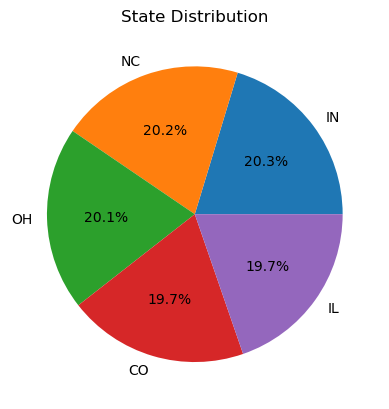

In [19]:
df[cat_cols[0]].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title(f"{cat_cols[0]} Distribution")
plt.ylabel("")
plt.show()


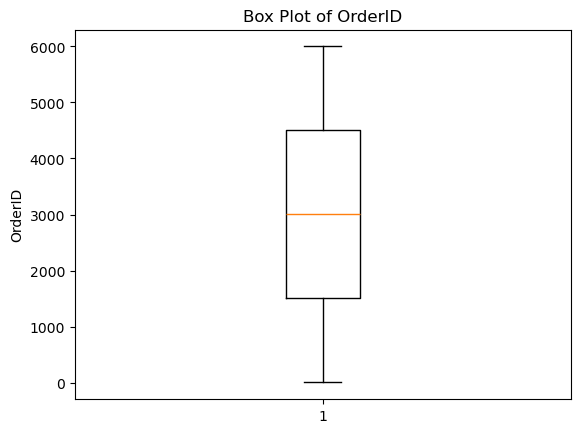

In [20]:
plt.boxplot(df[num_cols[0]])
plt.title(f"Box Plot of {num_cols[0]}")
plt.ylabel(num_cols[0])
plt.show()
